# Forest Cover Type - Exploration/Prediction

Hi! Thanks for checking this notebook. We'll we working on the Forest Cover Type dataset, which contains tree observations from four areas of the Roosevelt National Forest in Colorado.

In the first half of the notebook an exploratory analysis will be conducted using all of the available data.

In the second half we'll try to predict the forest cover type given the cartographic variables the dataset provides.


In [2]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('dark_background')
pd.set_option("display.max_rows", 100)

In [3]:
data = pd.read_csv('/mnt/c/Users/Andres/Downloads/covtype.csv')

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data.isnull().sum()
data['Cover_Type'].dtype

dtype('int64')

In [4]:
forest_map = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'}

data['Cover_Type'] = data['Cover_Type'].map(forest_map)

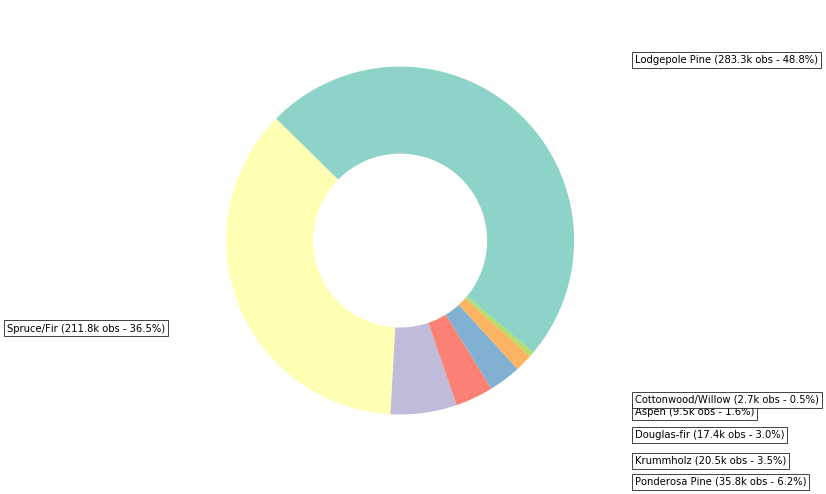

In [7]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

recipe = list(data['Cover_Type'].value_counts().index)

info = data['Cover_Type'].value_counts()

def pcts(val_list):
    pct = []
    for val in val_list:
        pct.append(" ({:.1f}k obs - {:.1f}%)".format(val/1000, 100*val/np.sum(val_list)))
    return pct

recipe2 = pcts(info)

wedges, texts = ax.pie(info, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    kw["color"] = 'k'
    ax.annotate(recipe[i]+recipe2[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Proportion of classes")

plt.show()

In [5]:
soil_types = [i for i in data.columns if 'Soil' in i]
wilderness_areas = [i for i in data.columns if 'Wilderness' in i]

data_categorical = data.copy(deep=True)
data_categorical = data_categorical.drop(soil_types, axis=1)
data_categorical = data_categorical.drop(wilderness_areas, axis=1)

data_categorical['Soil_Type'] = data[soil_types].idxmax(axis=1)
data_categorical['Wilderness_Area'] = data[wilderness_areas].idxmax(axis=1)

data_categorical['Soil_Type'] = data_categorical['Soil_Type'].str.replace('Soil_Type', '')
data_categorical['Wilderness_Area'] = data_categorical['Wilderness_Area'].str.replace('Wilderness_Area', '')

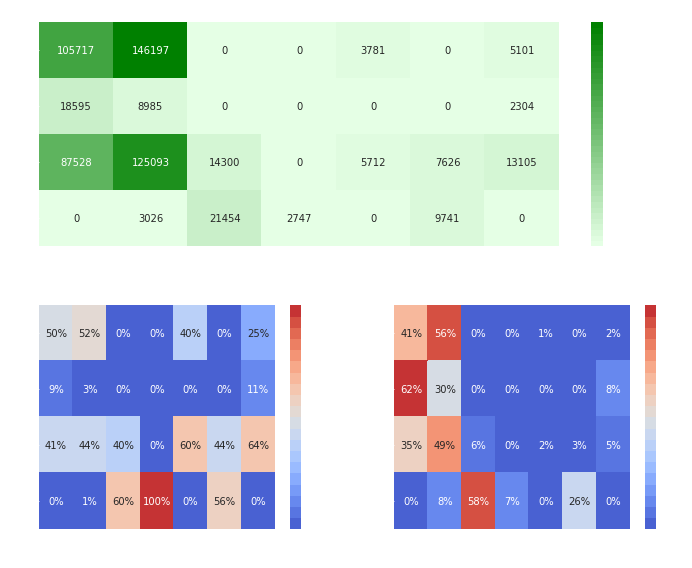

In [6]:
wild_ct = pd.crosstab(data_categorical['Wilderness_Area'], 
                      data_categorical['Cover_Type'])

wild_ct_pct = wild_ct.apply(lambda r: r/r.sum(), axis=0)
wild_ct_pct2 = wild_ct.apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(10,8))

ax1 = plt.subplot2grid((2,2), (0, 0), colspan=2, title='Overall Count of Wilderness Area')
ax2 = plt.subplot2grid((2,2), (1, 0), title='Proportion of WA across Cover Types - P(WA|CT)')
ax3 = plt.subplot2grid((2,2), (1, 1), title='Proportion of CT across Wilderness_Area - P(CT|WA)')

sns.heatmap(wild_ct, cmap=sns.light_palette("green", 40), annot=True, fmt='g', ax=ax1)
sns.heatmap(wild_ct_pct, cmap=sns.color_palette("coolwarm", 20), annot=True, fmt='.0%', ax=ax2)
sns.heatmap(wild_ct_pct2, cmap=sns.color_palette("coolwarm", 20), annot=True, fmt='.0%', ax=ax3)

plt.tight_layout()
plt.show()

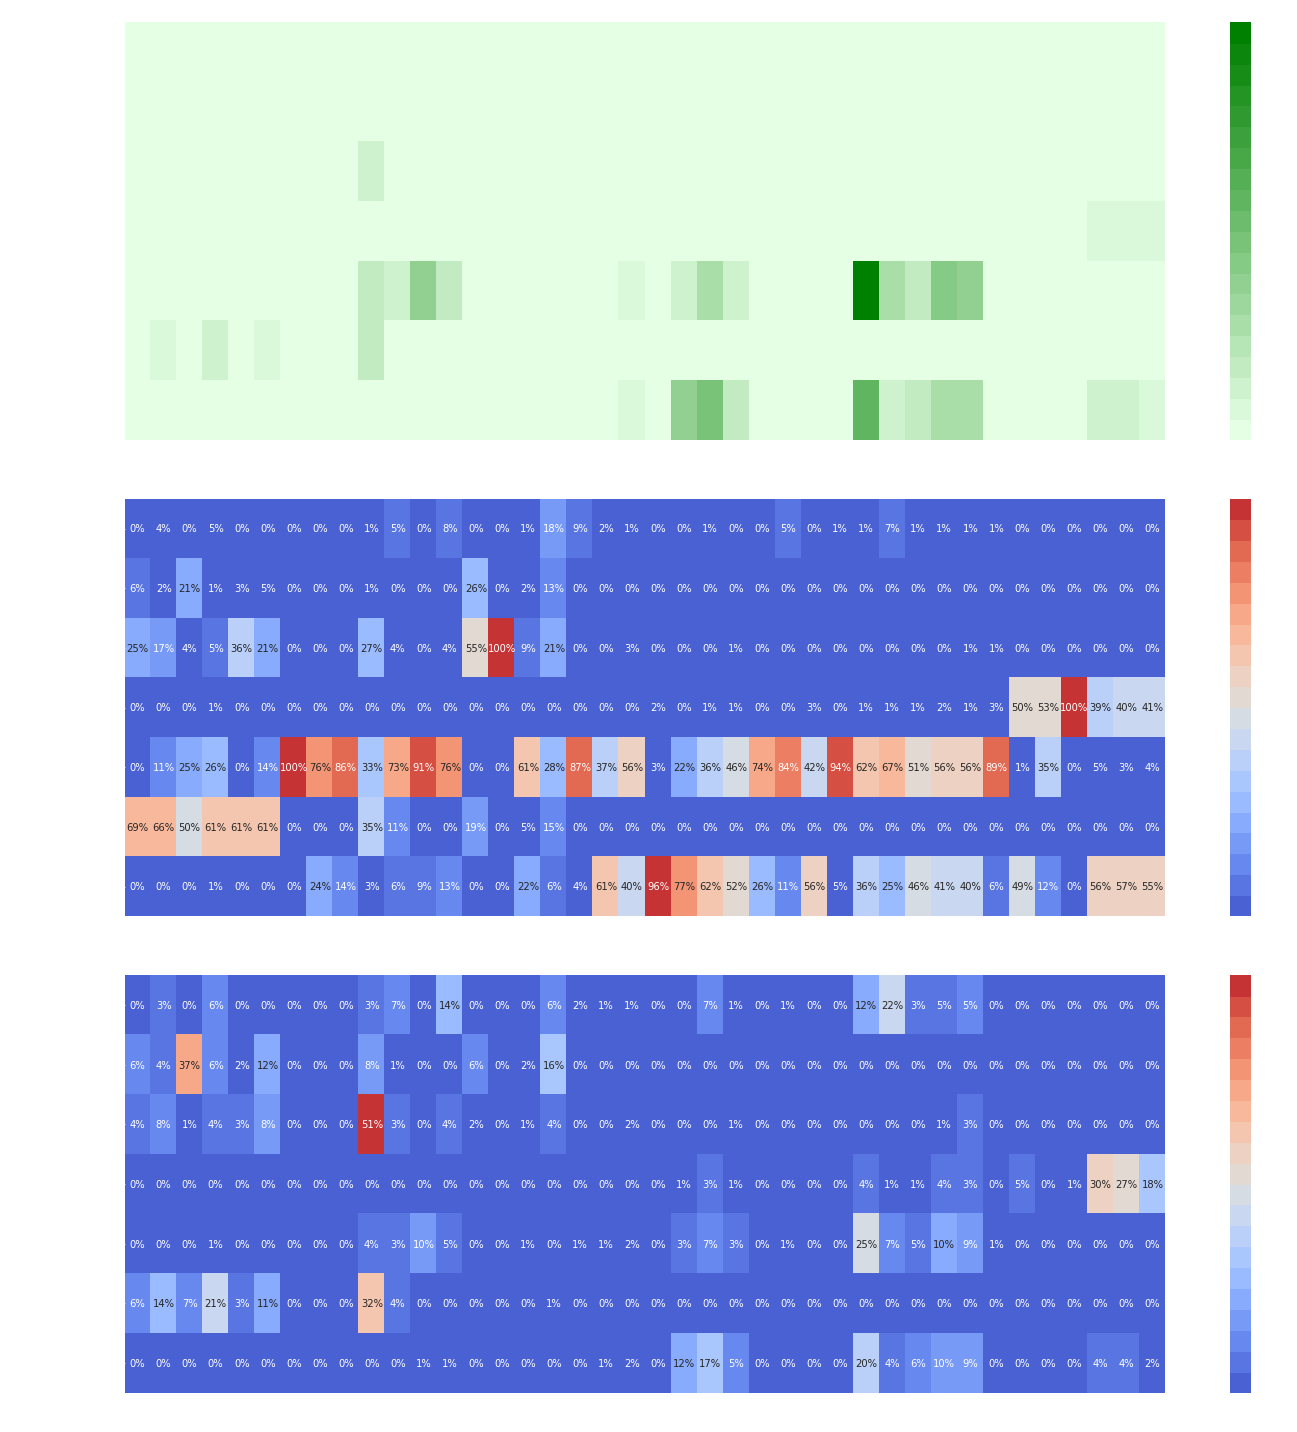

In [133]:
st = [str(i) for i in range(1,41)]

soil_ct = pd.crosstab(data_categorical['Soil_Type'], 
                      data_categorical['Cover_Type'])

soil_ct = soil_ct.T[st]

soil_ct_pct = soil_ct.apply(lambda r: r/r.sum(), axis=0)
soil_ct_pct2 = soil_ct.apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(20,20))

ax1 = plt.subplot2grid((3,1), (0, 0), colspan=2, title='Overall Count of Soil Type')
ax2 = plt.subplot2grid((3,1), (1, 0), title='Proportion of Soil Type across Cover Type - P(ST|CT)')
ax3 = plt.subplot2grid((3,1), (2, 0), title='Proportion of Cover Type across Soil Type - P(CT|ST)')

sns.heatmap(soil_ct, cmap=sns.light_palette("green", 20), annot=False, fmt='g', ax=ax1)
sns.heatmap(soil_ct_pct, cmap=sns.color_palette("coolwarm", 20), annot=True, fmt='.0%', ax=ax2)
sns.heatmap(soil_ct_pct2, cmap=sns.color_palette("coolwarm", 20), annot=True, fmt='.0%', ax=ax3)

plt.tight_layout()
plt.show()

In [5]:
data = data.drop(['Wilderness_Area4'], axis=1)
data = data.drop(['Soil_Type40'], axis=1)

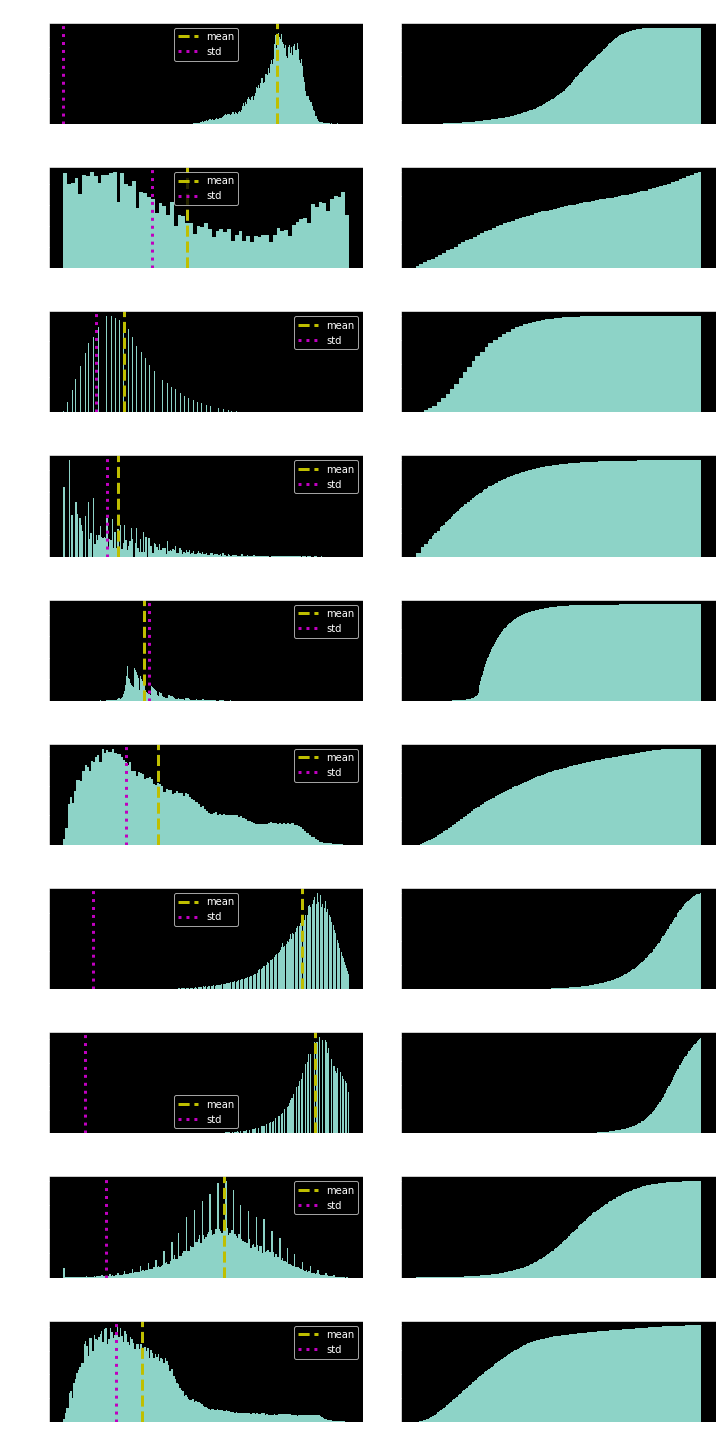

In [6]:
fig, axes = plt.subplots(10, 2, figsize=(10,20))

for i in range(10):
    pred_name = data.columns[i]
    axes[i, 0].hist(data.iloc[:, i], bins="auto", density=True)
    axes[i, 0].set_title(f"PDF of {pred_name}")
    axes[i, 0].axvline(data.iloc[:, i].mean(), color = "y", linestyle="dashed", label="mean", linewidth=3)
    axes[i, 0].axvline(data.iloc[:, i].std(), color = "m", linestyle="dotted", label="std", linewidth=3)
    axes[i, 0].legend(("mean", "std"),loc="best")
    
    axes[i, 1].hist(data.iloc[:, i], bins="auto", density=True, cumulative=True)
    axes[i, 1].set_title(f"CDF of {pred_name}")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

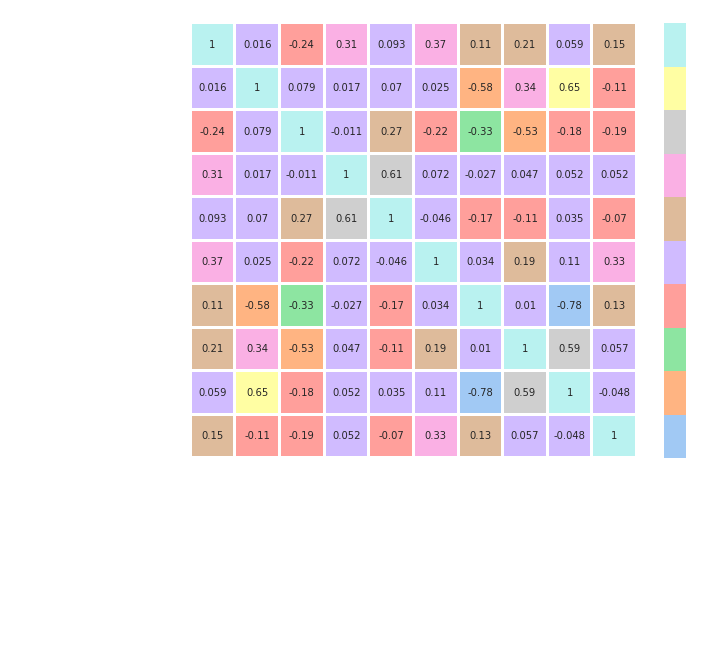

In [27]:
data_nmc = data.copy()
data_nmc = data_nmc.iloc[:, 0:10]
#data_nmc['ec_ip'] = data_nmc['ec_ip'].apply(np.log)
correlation = data_nmc.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("pastel"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

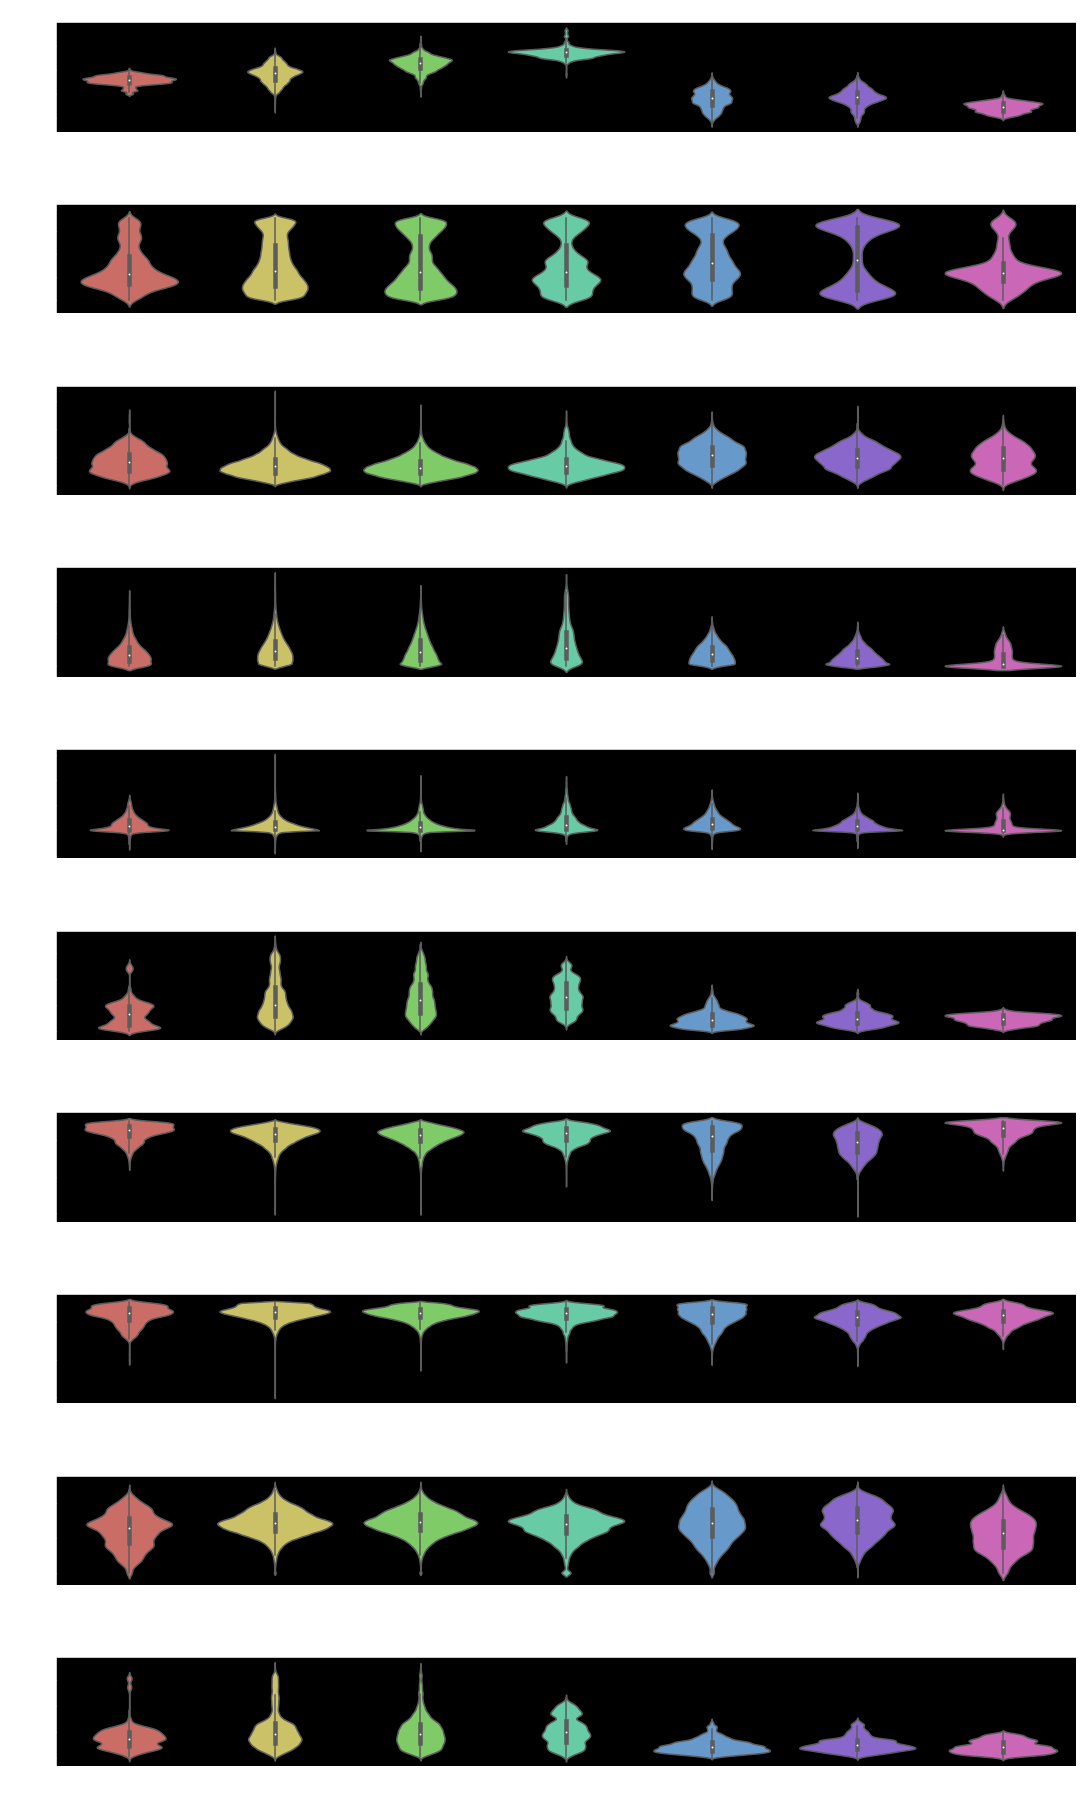

In [12]:
plt.figure(figsize=(15,25))

for i in range(10):
    plt.subplot(10,1,i+1)
    sns.violinplot(x=data['Cover_Type'],y=data.iloc[:, i],
                   palette=sns.color_palette("hls", 7),alpha=.5)
    plt.title(data.columns[i])
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

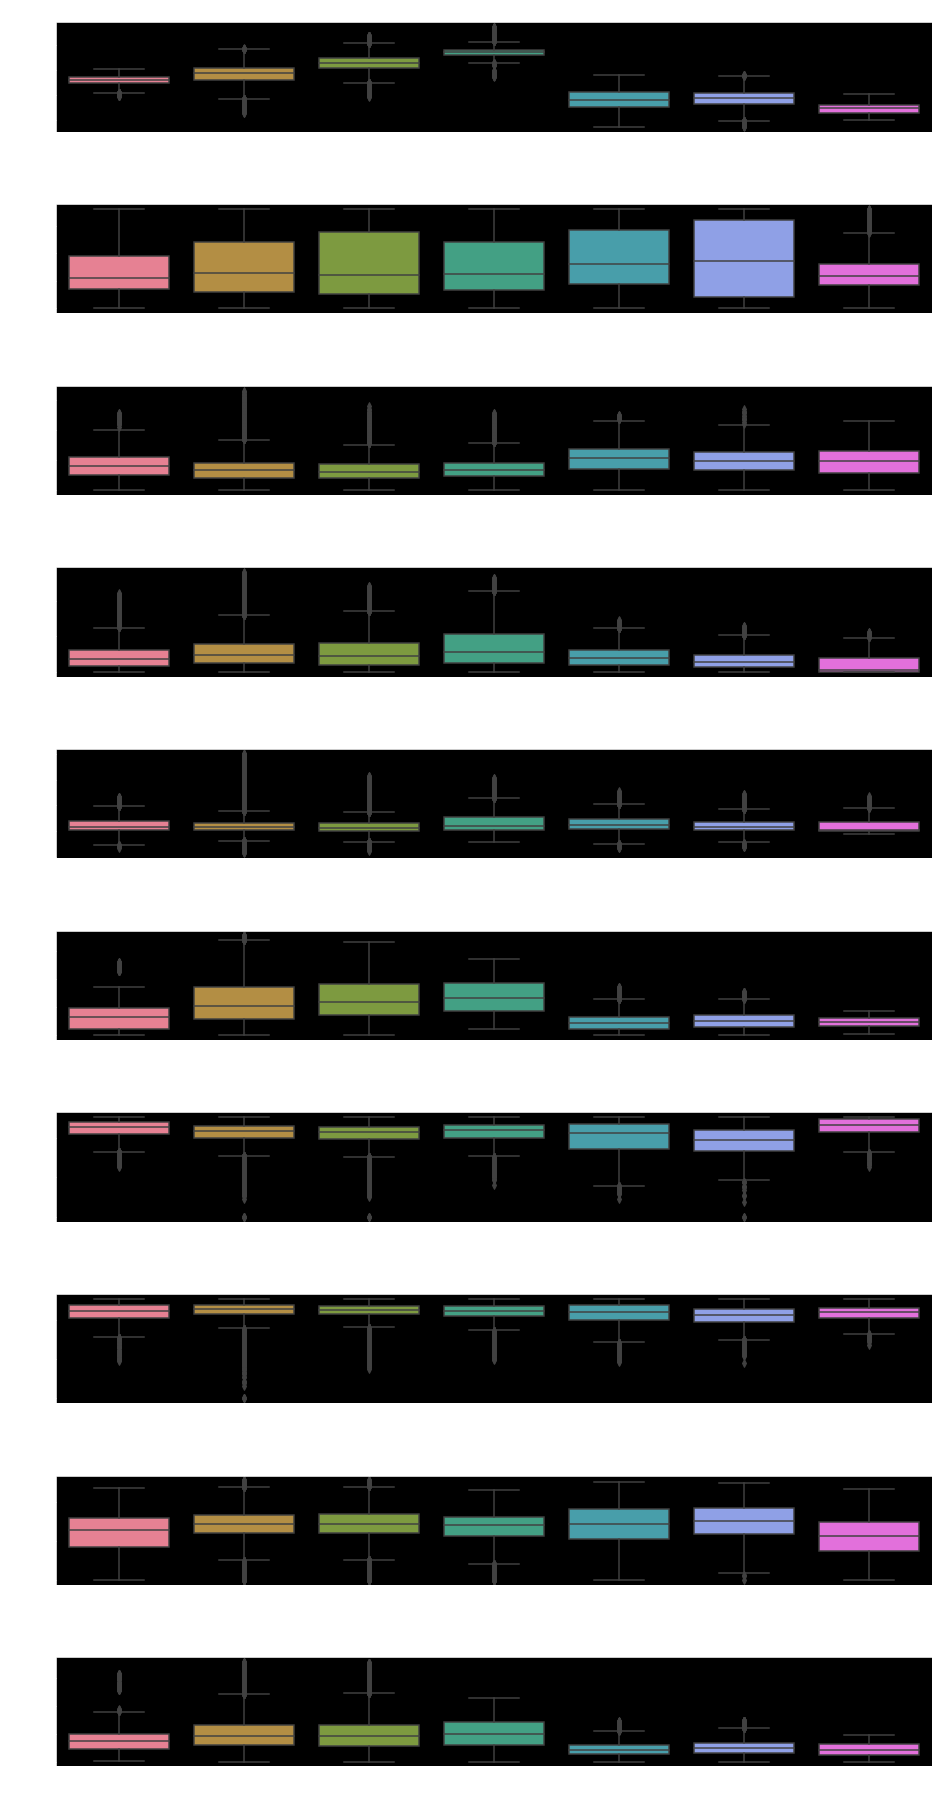

In [38]:
plt.figure(figsize=(13,25))

for i in range(10):
    plt.subplot(10,1,i+1)
    sns.boxplot(data['Cover_Type'],y=data.iloc[:, i], 
                palette=sns.color_palette("husl", 7), color="w")
    plt.title(data.columns[i])
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()



In [29]:
from sklearn.preprocessing import StandardScaler

num_data = data.copy(deep=True)
num_data = data.iloc[:,:10]
num_data = num_data.astype(np.float64)

std_scaler = StandardScaler()
std_scaler.fit(num_data)
num_data = pd.DataFrame(std_scaler.transform(num_data), columns=num_data.columns)

In [ ]:
from sklearn.decomposition import PCA

In [31]:
num_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479
5,-1.358523,-0.211385,-1.082191,0.143834,-1.053584,-1.464256,0.666942,0.692069,-0.066056,3.058999
6,-1.262089,-0.988770,-0.948649,0.002690,-0.710502,-1.101262,0.368099,0.085048,-0.118310,3.228914
7,-1.265660,-0.953028,-1.349277,-0.166682,-0.676194,-1.139742,0.368099,0.337973,0.038452,3.207769
8,-1.222801,-0.988770,-0.681563,-0.138454,0.164356,-1.080098,0.405454,-0.117292,-0.248945,3.219852
9,-1.240659,-0.863673,-0.548020,-0.105520,-0.607578,-1.099338,0.592231,-0.218463,-0.484089,3.209279


In [33]:
num_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05
mean,-3.819486e-16,-3.913408e-17,6.417988e-17,-7.122402e-17,8.061620e-17,2.191508e-17,5.060036e-16,3.025064e-16,-1.385346e-16,1.565363e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.930094e+00,-1.390866e+00,-1.883448e+00,-1.267604e+00,-3.763928e+00,-1.507225e+00,-7.924808e+00,-1.129659e+01,-3.723844e+00,-1.495469e+00
25%,-5.370487e-01,-8.726087e-01,-6.815629e-01,-7.594865e-01,-6.761941e-01,-7.979117e-01,-5.284318e-01,-5.219730e-01,-6.147243e-01,-7.221685e-01
50%,1.308455e-01,-2.560618e-01,-1.473917e-01,-2.419591e-01,-2.816503e-01,-2.264844e-01,2.186769e-01,1.356329e-01,1.232511e-02,-2.041175e-01
75%,7.273071e-01,9.323547e-01,5.203224e-01,5.390366e-01,3.873587e-01,6.271292e-01,7.042976e-01,6.920686e-01,6.655016e-01,4.302306e-01
max,3.209587e+00,1.825901e+00,6.930377e+00,5.304993e+00,9.513327e+00,3.057138e+00,1.563473e+00,1.552015e+00,2.912429e+00,3.921411e+00
